# Assignment: Implementing Gradient Descent and Stochastic Gradient Descent

## Understanding Different Types of Gradient Descent
### Stochastic Gradient Descent (SGD)
Stochastic Gradient Descent updates the model parameters using only one randomly chosen data point per iteration. 

This makes it computationally efficient and allows it to escape local minima, but it can be noisy and less stable compared to other methods. 

The randomness in the updates introduces variance, which can sometimes help in finding a better solution, but may also slow down convergence or cause oscillations.

Mathematically, the update rule for SGD is:
$$ \theta^{(t+1)} = \theta^{(t)} - \alpha \nabla J_i(\theta) $$
where:
- $\theta$ represents the parameters
- $\alpha$ is the learning rate
- $\nabla J_i(\theta)$ is the gradient computed using a single data point $$ i $$


### Mini-Batch Gradient Descent
Mini-Batch Gradient Descent is a compromise between batch and stochastic gradient descent. Instead of using the entire dataset or a single data point, it updates the parameters using a small batch of randomly selected data points. This balances stability and efficiency, making it a commonly used approach in deep learning. Mini-batch gradient descent helps smooth out some of the noise of SGD while still being computationally efficient. The batch size is a hyperparameter that affects convergence speed and accuracy.

The update rule for mini-batch gradient descent is:
$$ \theta^{(t+1)} = \theta^{(t)} - \alpha \frac{1}{m} \sum_{i=1}^{m} \nabla J_i(\theta) $$
where:
- $m$ is the mini-batch size
- $\sum_{i=1}^{m} \nabla J_i(\theta)$ represents the gradient computed over a batch of $m$ data points

### Batch Gradient Descent (Vanilla)
Batch Gradient Descent computes the gradient using the entire dataset at each iteration. 

While this method leads to a smooth convergence, it is computationally expensive, especially for large datasets. 

It tends to be more stable and can find the optimal solution efficiently, but it may take longer compared to SGD and Mini-Batch Gradient Descent.

The update rule for batch gradient descent is:
$$ \theta^{(t+1)} = \theta^{(t)} - \alpha \nabla J(\theta) $$
where:
- $\nabla J(\theta)$ is the gradient computed over the entire dataset


## Task 1: Implement Gradient Descent for a Quadratic Function
1. Define a quadratic function, e.g., $$ f(x) = x^2 $$.
2. Implement a gradient descent to minimize this function.
3. Use different learning rates and visualize the convergence.
4. Plot the function and the gradient descent path.
5. Plot the evolution of loss across iterations

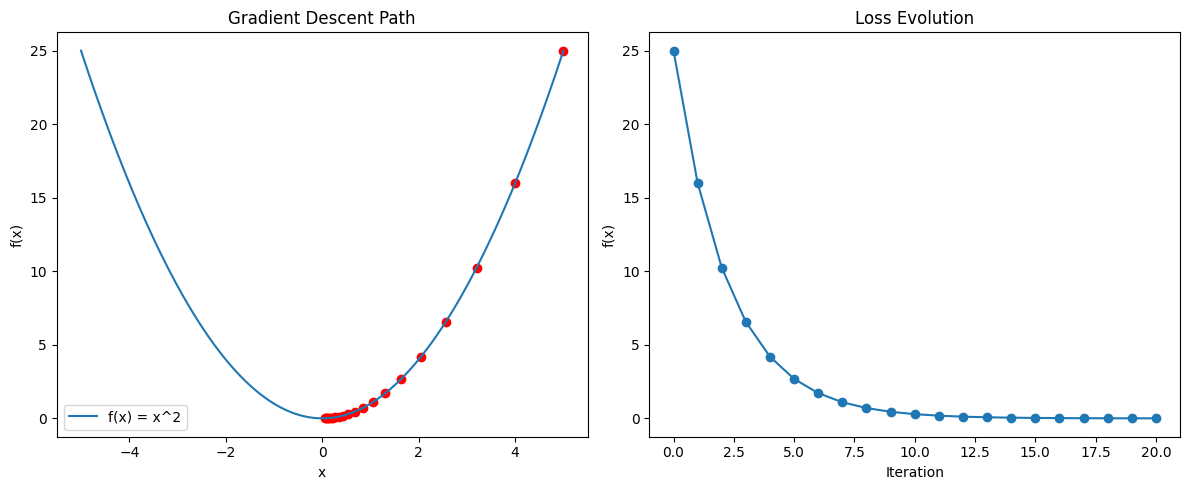

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return x**2

def grad_f(x):
    return 2*x

x = 5  
lr = 0.1  
num_iters = 20

history = [x]

for i in range(num_iters):
    x = x - lr * grad_f(x)
    history.append(x)


xs = np.linspace(-5, 5, 200)
ys = f(xs)

plt.figure(figsize=(12, 5))


plt.subplot(1, 2, 1)
plt.plot(xs, ys, label='f(x) = x^2')
plt.scatter(history, [f(x) for x in history], color='red')
plt.title('Gradient Descent Path')
plt.xlabel('x'); plt.ylabel('f(x)')
plt.legend()


plt.subplot(1, 2, 2)
plt.plot([f(x) for x in history], marker='o')
plt.title('Loss Evolution')
plt.xlabel('Iteration'); plt.ylabel('f(x)')
plt.tight_layout()
plt.show()


## Task 2: Gradient Descent in Higher Dimensions
1. Define a function like $$ f(x, y) = x^2 + y^2 $$.
2. Implement gradient descent for two variables.
3. Visualize the contour plot and the optimization path.
4. Experiment with different initialization points and learning rates.

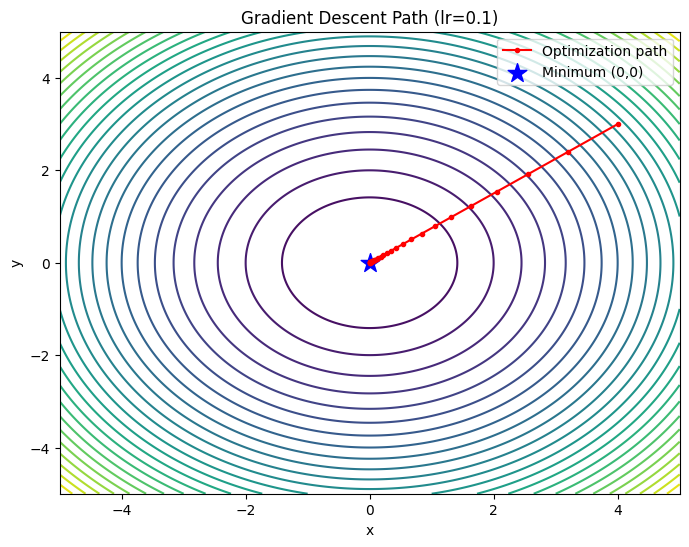

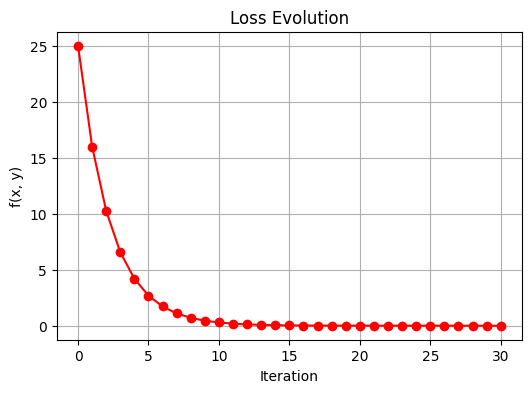

In [7]:
import numpy as np
import matplotlib.pyplot as plt

def f(x, y):
    return x**2 + y**2

def grad_f(x, y):
    return np.array([2*x, 2*y])  

def gradient_descent(lr=0.1, iterations=30, start=(4, 3)):
    x, y = start
    path = [(x, y)]
    
    for i in range(iterations):
        grad = grad_f(x, y)
        x = x - lr * grad[0]
        y = y - lr * grad[1]
        path.append((x, y))
    
    return np.array(path)


learning_rate = 0.1
iterations = 30
start_point = (4, 3)
path = gradient_descent(learning_rate, iterations, start_point)


x_vals = np.linspace(-5, 5, 400)
y_vals = np.linspace(-5, 5, 400)
X, Y = np.meshgrid(x_vals, y_vals)
Z = f(X, Y)

plt.figure(figsize=(8, 6))
plt.contour(X, Y, Z, levels=30, cmap='viridis')  
plt.plot(path[:, 0], path[:, 1], 'r.-', label='Optimization path')  
plt.scatter(0, 0, color='blue', marker='*', s=200, label='Minimum (0,0)')
plt.title(f'Gradient Descent Path (lr={learning_rate})')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

loss = [f(x, y) for x, y in path]
plt.figure(figsize=(6, 4))
plt.plot(loss, 'o-', color='red')
plt.title('Loss Evolution')
plt.xlabel('Iteration')
plt.ylabel('f(x, y)')
plt.grid(True)
plt.show()


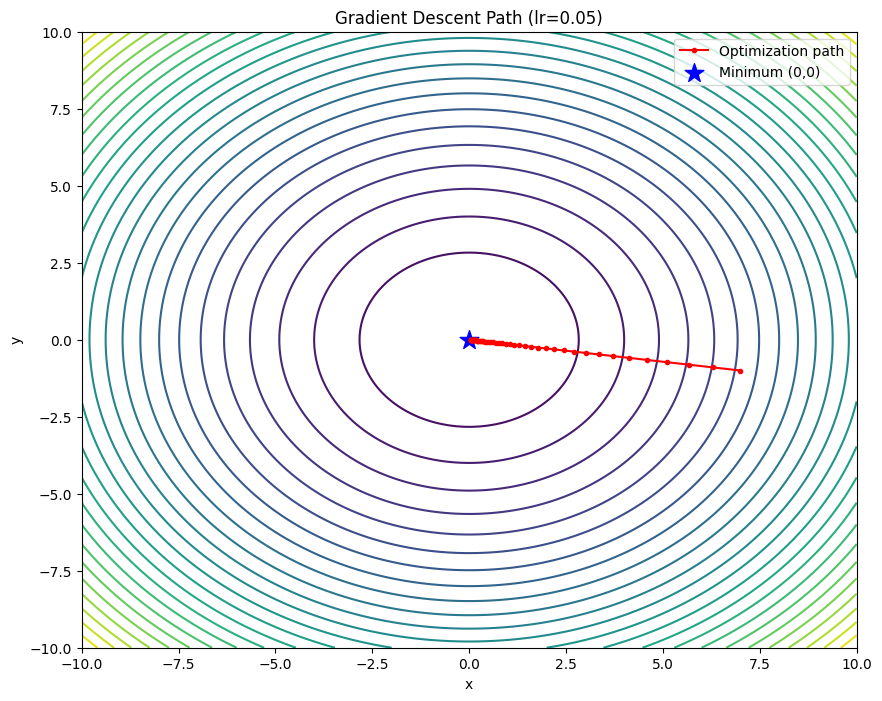

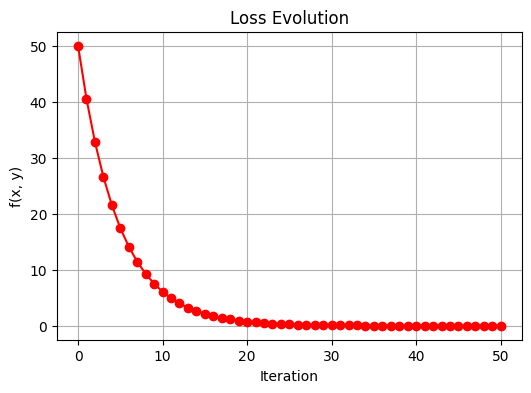

In [9]:
import numpy as np
import matplotlib.pyplot as plt

def f(x, y):
    return x**2 + y**2

def grad_f(x, y):
    return np.array([2*x, 2*y])  

def gradient_descent(lr=0.1, iterations=30, start=(4, 3)):
    x, y = start
    path = [(x, y)]
    
    for i in range(iterations):
        grad = grad_f(x, y)
        x = x - lr * grad[0]
        y = y - lr * grad[1]
        path.append((x, y))
    
    return np.array(path)


learning_rate = 0.05
iterations = 50
start_point = (7, -1)
path = gradient_descent(learning_rate, iterations, start_point)


x_vals = np.linspace(-10, 10, 400)
y_vals = np.linspace(-10, 10, 400)
X, Y = np.meshgrid(x_vals, y_vals)
Z = f(X, Y)

plt.figure(figsize=(10, 8))
plt.contour(X, Y, Z, levels=30, cmap='viridis')  
plt.plot(path[:, 0], path[:, 1], 'r.-', label='Optimization path')  
plt.scatter(0, 0, color='blue', marker='*', s=200, label='Minimum (0,0)')
plt.title(f'Gradient Descent Path (lr={learning_rate})')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

loss = [f(x, y) for x, y in path]
plt.figure(figsize=(6, 4))
plt.plot(loss, 'o-', color='red')
plt.title('Loss Evolution')
plt.xlabel('Iteration')
plt.ylabel('f(x, y)')
plt.grid(True)
plt.show()


## Task 3: Implement Stochastic Gradient Descent (SGD)
1. Generate a synthetic dataset : $$ y = 3x + 5 + \text{noise} $$.
2. Run gradient descent for linear regression.
3. Run stochastic gradient descent and compare results.
4. Plot the regression line and analyze the difference in convergence speed.

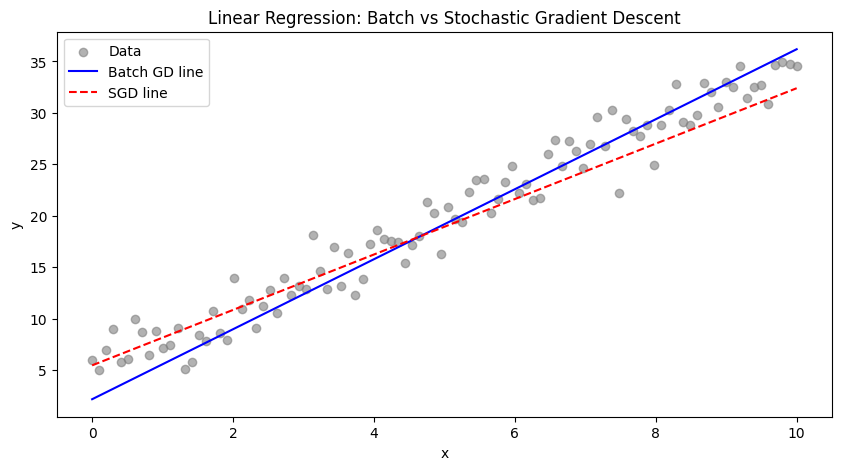

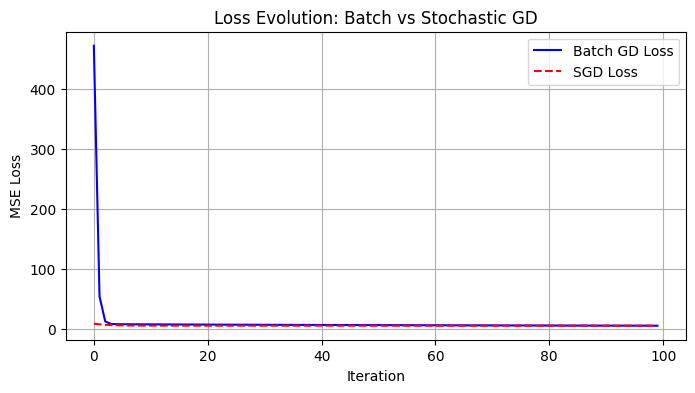

In [11]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)
X = np.linspace(0, 10, 100)
y = 3 * X + 5 + np.random.randn(100) * 2 


X = X.reshape(-1, 1)
y = y.reshape(-1, 1)


def batch_gradient_descent(X, y, lr=0.01, iterations=100):
    n = len(X)
    w, b = 0.0, 0.0
    history = []

    for _ in range(iterations):
        y_pred = w * X + b
        dw = (-2/n) * np.sum(X * (y - y_pred))
        db = (-2/n) * np.sum(y - y_pred)
        w -= lr * dw
        b -= lr * db
        loss = np.mean((y - y_pred)**2)
        history.append(loss)
    return w, b, history

def stochastic_gradient_descent(X, y, lr=0.01, iterations=100):
    n = len(X)
    w, b = 0.0, 0.0
    history = []

    for _ in range(iterations):
        for i in range(n):
            xi, yi = X[i], y[i]
            y_pred = w * xi + b
            dw = -2 * xi * (yi - y_pred)
            db = -2 * (yi - y_pred)
            w -= lr * dw
            b -= lr * db
        y_pred_all = w * X + b
        loss = np.mean((y - y_pred_all)**2)
        history.append(loss)
    return w, b, history


w_batch, b_batch, loss_batch = batch_gradient_descent(X, y, lr=0.01, iterations=100)
w_sgd, b_sgd, loss_sgd = stochastic_gradient_descent(X, y, lr=0.01, iterations=100)


plt.figure(figsize=(10, 5))
plt.scatter(X, y, color='gray', alpha=0.6, label='Data')
plt.plot(X, w_batch * X + b_batch, color='blue', label='Batch GD line')
plt.plot(X, w_sgd * X + b_sgd, color='red', linestyle='--', label='SGD line')
plt.title("Linear Regression: Batch vs Stochastic Gradient Descent")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

plt.figure(figsize=(8, 4))
plt.plot(loss_batch, label='Batch GD Loss', color='blue')
plt.plot(loss_sgd, label='SGD Loss', color='red', linestyle='--')
plt.title("Loss Evolution: Batch vs Stochastic GD")
plt.xlabel("Iteration")
plt.ylabel("MSE Loss")
plt.legend()
plt.grid(True)
plt.show()


### Task 4
1. Define the multimodal function $$f(x, y) = (x^2 + y^2) * sin(x) * sin(y) + x^2 + y^2$$.
2. Visualize the 3D surface plot as well as the contour plot.
3. What could be a problem for convergence of the algorithm here ?
5. Run the gradient descent algorithm with different initial values and learning rates.
7. Add the optimization path to the contour plot for each initial value.
8. Compare the performance path of gradient descent and stochastic gradient descent for each initial value.



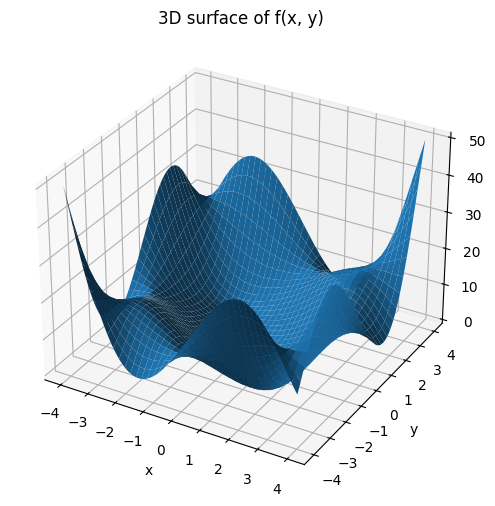

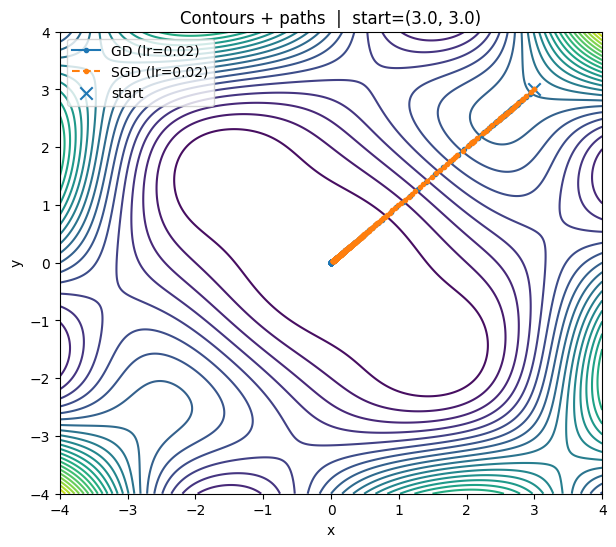

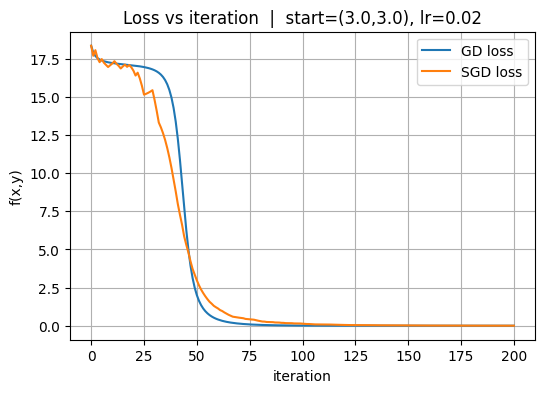

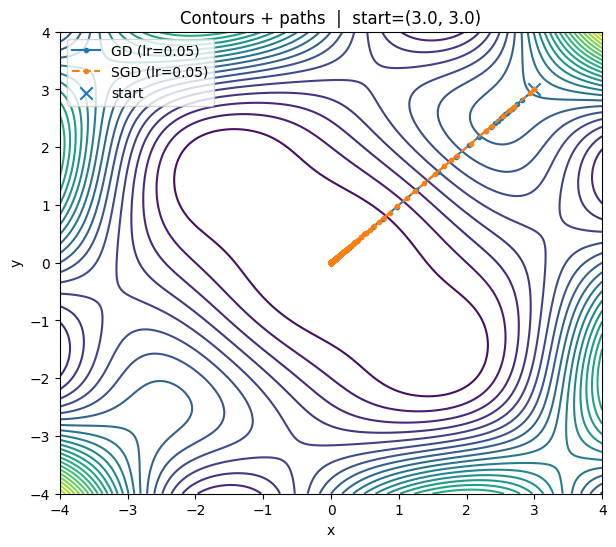

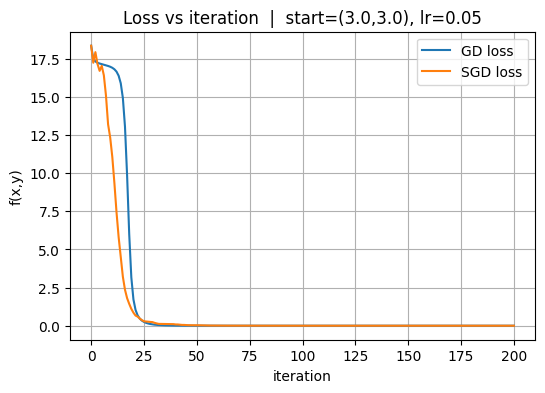

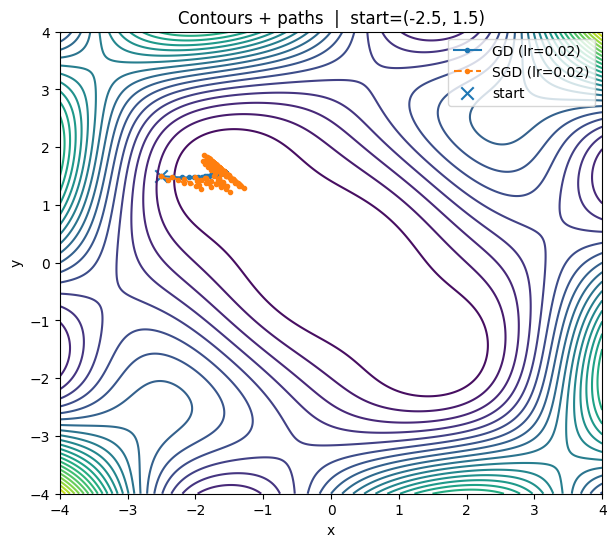

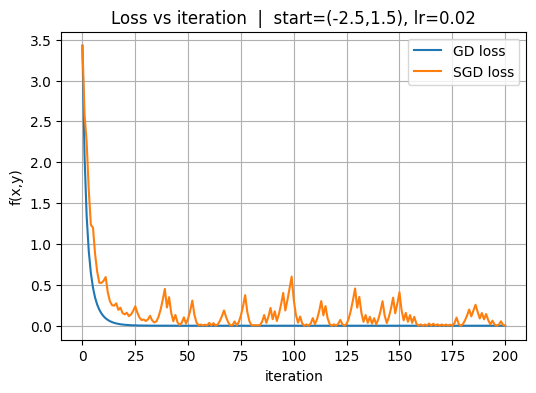

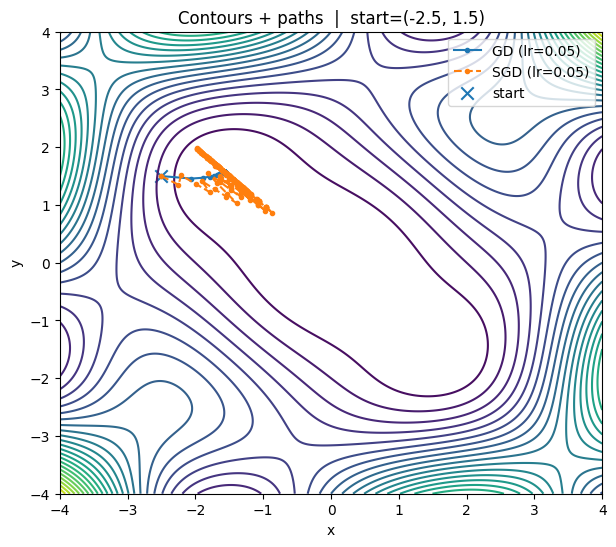

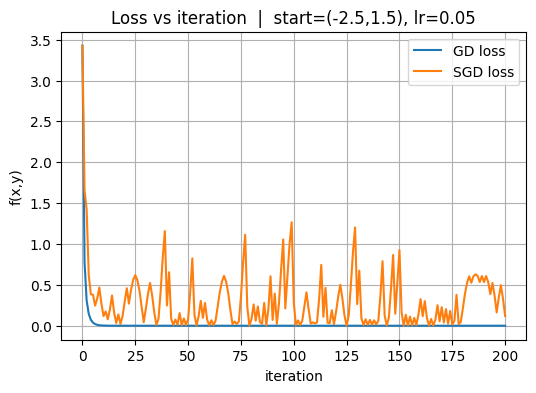

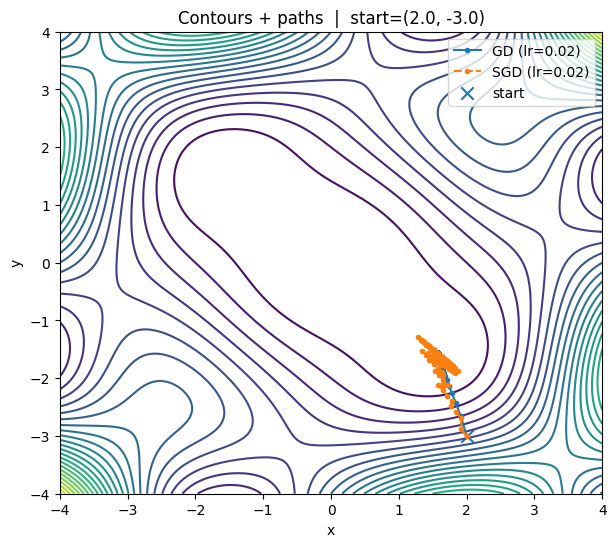

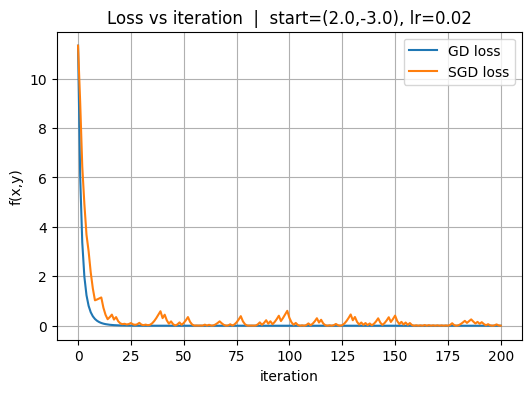

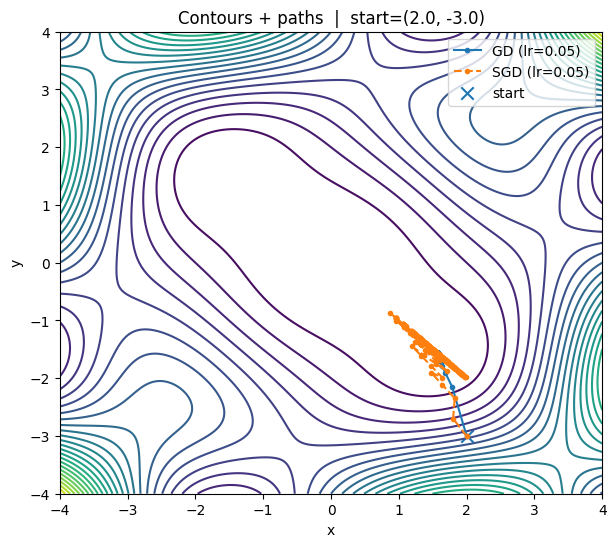

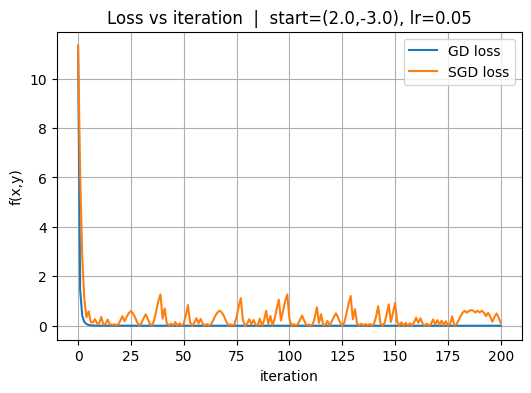

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def f(x, y):
    r2 = x**2 + y**2
    return r2 * (np.sin(x)*np.sin(y) + 1.0)

def grad_full(x, y):
    r2 = x**2 + y**2
    dfx = 2*x*(np.sin(x)*np.sin(y) + 1.0) + r2*(np.cos(x)*np.sin(y))
    dfy = 2*y*(np.sin(x)*np.sin(y) + 1.0) + r2*(np.sin(x)*np.cos(y))
    return np.array([dfx, dfy])

def grad_f1(x, y):
    r2 = x**2 + y**2
    dfx = 2*x*np.sin(x)*np.sin(y) + r2*np.cos(x)*np.sin(y)
    dfy = 2*y*np.sin(x)*np.sin(y) + r2*np.sin(x)*np.cos(y)
    return np.array([dfx, dfy])

def grad_f2(x, y):
    return np.array([2*x, 2*y])

def gradient_descent(x0, y0, lr=0.05, iters=200):
    x, y = float(x0), float(y0)
    path = [(x, y)]
    losses = [f(x, y)]
    for _ in range(iters):
        gx, gy = grad_full(x, y)
        x -= lr * gx
        y -= lr * gy
        path.append((x, y))
        losses.append(f(x, y))
    return np.array(path), np.array(losses)

def stochastic_gd(x0, y0, lr=0.05, iters=200, p=0.5, noise_std=0.0, seed=0):
    rng = np.random.default_rng(seed)
    x, y = float(x0), float(y0)
    path = [(x, y)]
    losses = [f(x, y)]
    for _ in range(iters):
        if rng.random() < p:
            g = grad_f1(x, y)
        else:
            g = grad_f2(x, y)
        if noise_std > 0:
            g = g + rng.normal(0.0, noise_std, size=2)
        x -= lr * g[0]
        y -= lr * g[1]
        path.append((x, y))
        losses.append(f(x, y))
    return np.array(path), np.array(losses)

def plot_surface(xlim=(-4,4), ylim=(-4,4), step=0.05):
    X = np.arange(xlim[0], xlim[1]+step, step)
    Y = np.arange(ylim[0], ylim[1]+step, step)
    XX, YY = np.meshgrid(X, Y)
    ZZ = f(XX, YY)

    fig = plt.figure(figsize=(8,6))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(XX, YY, ZZ)
    ax.set_title('3D surface of f(x, y)')
    ax.set_xlabel('x'); ax.set_ylabel('y'); ax.set_zlabel('f')
    plt.show()

def plot_contours_with_paths(starts, lr_list, iters=200, xlim=(-4,4), ylim=(-4,4)):
    X = np.linspace(*xlim, 400)
    Y = np.linspace(*ylim, 400)
    XX, YY = np.meshgrid(X, Y)
    ZZ = f(XX, YY)

    for (x0, y0) in starts:
        for lr in lr_list:
            path_gd, loss_gd = gradient_descent(x0, y0, lr=lr, iters=iters)
            path_sgd, loss_sgd = stochastic_gd(x0, y0, lr=lr, iters=iters, p=0.5, noise_std=0.0, seed=42)

            plt.figure(figsize=(7,6))
            plt.contour(XX, YY, ZZ, levels=30)
            plt.plot(path_gd[:,0], path_gd[:,1], marker='.', label=f'GD (lr={lr})')
            plt.plot(path_sgd[:,0], path_sgd[:,1], marker='.', linestyle='--', label=f'SGD (lr={lr})')
            plt.scatter([x0], [y0], marker='x', s=80, label='start')
            plt.title(f'Contours + paths  |  start=({x0}, {y0})')
            plt.xlabel('x'); plt.ylabel('y')
            plt.legend()
            plt.show()

            plt.figure(figsize=(6,4))
            plt.plot(loss_gd, label='GD loss')
            plt.plot(loss_sgd, label='SGD loss')
            plt.title(f'Loss vs iteration  |  start=({x0},{y0}), lr={lr}')
            plt.xlabel('iteration'); plt.ylabel('f(x,y)')
            plt.legend(); plt.grid(True)
            plt.show()

plot_surface(xlim=(-4,4), ylim=(-4,4), step=0.05)

starts = [(3.0, 3.0), (-2.5, 1.5), (2.0, -3.0)]
lr_list = [0.02, 0.05]
plot_contours_with_paths(starts, lr_list, iters=200, xlim=(-4,4), ylim=(-4,4))


## SKlearn regressions library

- Take one dataset we already used for previous weeks. 
- Prepare data to train a model
- Fit a linear regression with OLS method
- Fit a linear regression with gradient descent (look at sklearn documentation to do so)
- Compare and explain the results


--- Results ---
OLS  -> R²: 0.7902,  MSE: 10.7109
SGD  -> R²: 0.8090,  MSE: 9.7476

OLS Coefficients: [-0.58705525  1.56527255 -0.81420529 -5.15767051  0.10676699  2.78255456
  1.30024012]
SGD Coefficients: [-0.25604514  1.29122884 -0.69557712 -4.7850978  -0.07882108  2.60436216
  1.06603537]

OLS Intercept: 23.599361022364224
SGD Intercept: [23.25006059]


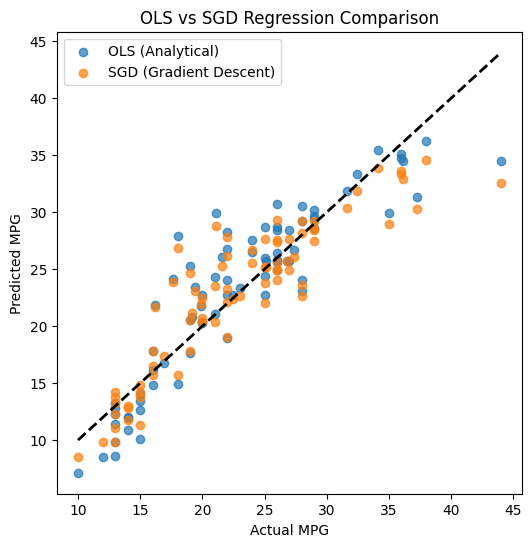

In [10]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression,SGDRegressor
from sklearn.metrics import mean_squared_error, r2_score

df = pd.read_csv("auto.csv")

df = df.replace('?', np.nan)

for col in df.columns:
    if col != 'name':  
        df[col] = pd.to_numeric(df[col], errors='coerce')

df = df.dropna()

X = df.drop(columns=['mpg', 'name'])
y = df['mpg']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

ols_model = LinearRegression()
ols_model.fit(X_train_scaled, y_train)
y_pred_ols = ols_model.predict(X_test_scaled)


sgd_model = SGDRegressor(
    max_iter=1000,
    tol=1e-3,
    penalty=None,
    learning_rate='constant',
    eta0=0.01,
    random_state=42
)
sgd_model.fit(X_train_scaled, y_train)
y_pred_sgd = sgd_model.predict(X_test_scaled)

print("\n--- Results ---")
print(f"OLS  -> R²: {r2_score(y_test, y_pred_ols):.4f},  MSE: {mean_squared_error(y_test, y_pred_ols):.4f}")
print(f"SGD  -> R²: {r2_score(y_test, y_pred_sgd):.4f},  MSE: {mean_squared_error(y_test, y_pred_sgd):.4f}")

print("\nOLS Coefficients:", ols_model.coef_)
print("SGD Coefficients:", sgd_model.coef_)
print("\nOLS Intercept:", ols_model.intercept_)
print("SGD Intercept:", sgd_model.intercept_)

import matplotlib.pyplot as plt

plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred_ols, label='OLS (Analytical)', alpha=0.7)
plt.scatter(y_test, y_pred_sgd, label='SGD (Gradient Descent)', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel("Actual MPG")
plt.ylabel("Predicted MPG")
plt.legend()
plt.title("OLS vs SGD Regression Comparison")
plt.show()
